In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import requests
import pandas as pd

In [2]:
path = 'C:/Users/georg/Documents/JHU/Theory of ML/Group Project/'
file = path + 'data_with_doc2vec.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True).reset_index()
date_80_pctile = df['Date'].quantile(0.8)
df_holdout = df[df['Date'] > date_80_pctile].reset_index()
df = df[df['Date'] <= date_80_pctile].reset_index()

In [5]:
print(df.head)

<bound method NDFrame.head of        index                                              Title       Date  \
0          0   JPMorgan Predicts 2008 Will Be "Nothing But Net" 2008-01-02   
1          1  Dow Tallies Biggest First-session-of-year Poin... 2008-01-02   
2          2                   2008 predictions for the S&P 500 2008-01-02   
3          3  U.S. Stocks Higher After Economic Data, Monsan... 2008-01-03   
4          4  U.S. Stocks Climb As Hopes Increase For More F... 2008-01-07   
...      ...                                                ...        ...   
15301  15301  Palo Alto Networks promoted to S&P 500, replac... 2023-06-02   
15302  15302  Analysts Making Smaller Cuts Than Average to E... 2023-06-02   
15303  15303             The S&P 500 is ridiculous. Here’s why. 2023-06-02   
15304  15304                     Nasdaq, S&P 500 Set 2023 Highs 2023-06-02   
15305  15305  NASDAQ 100, Dow Jones, S&P 500: Stock Futures ... 2023-06-02   

            CP                   

In [6]:
df2 = pd.read_csv(path + "add_lexicon_sentiment_to_headlines.csv")
df2 = df2.drop(columns=["ma5", "return", "target", "CP", "Date", "next_close"]).drop_duplicates()
print(df2.shape)

(18049, 3)


In [7]:
merged_df = pd.merge(df, df2, on='Title')

In [8]:
print(df.shape)
print(merged_df.shape)

(15306, 105)
(15302, 107)


In [9]:
print(merged_df.head)

<bound method NDFrame.head of        index                                              Title       Date  \
0          4  U.S. Stocks Climb As Hopes Increase For More F... 2008-01-07   
1          5  How Investing in Intangibles -- Like Employee ... 2008-01-09   
2          6         Head And Shoulders Top Bodes Ill For Bulls 2008-01-09   
3          7  U.S. Stocks Zigzag Higher As Bernanke Speech S... 2008-01-10   
4          8  It's a Black Monday as stock markets tank in e... 2008-01-22   
...      ...                                                ...        ...   
15297  15301  Palo Alto Networks promoted to S&P 500, replac... 2023-06-02   
15298  15302  Analysts Making Smaller Cuts Than Average to E... 2023-06-02   
15299  15303             The S&P 500 is ridiculous. Here’s why. 2023-06-02   
15300  15304                     Nasdaq, S&P 500 Set 2023 Highs 2023-06-02   
15301  15305  NASDAQ 100, Dow Jones, S&P 500: Stock Futures ... 2023-06-02   

            CP                   

In [10]:
print(merged_df.columns)

Index(['index', 'Title', 'Date', 'CP', 'Title_Vector', 'doc2vec_1',
       'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5',
       ...
       'doc2vec_93', 'doc2vec_94', 'doc2vec_95', 'doc2vec_96', 'doc2vec_97',
       'doc2vec_98', 'doc2vec_99', 'doc2vec_100', 'sent_sum', 'sent_avg'],
      dtype='object', length=107)


In [11]:
merged_df['Date_Updated'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date_Updated', inplace=True)
merged_df.sort_index(inplace=True)

In [12]:
print(merged_df.head)

<bound method NDFrame.head of               index                                              Title  \
Date_Updated                                                             
2008-01-07        4  U.S. Stocks Climb As Hopes Increase For More F...   
2008-01-09        5  How Investing in Intangibles -- Like Employee ...   
2008-01-09        6         Head And Shoulders Top Bodes Ill For Bulls   
2008-01-10        7  U.S. Stocks Zigzag Higher As Bernanke Speech S...   
2008-01-22        8  It's a Black Monday as stock markets tank in e...   
...             ...                                                ...   
2023-06-02    15301  Palo Alto Networks promoted to S&P 500, replac...   
2023-06-02    15302  Analysts Making Smaller Cuts Than Average to E...   
2023-06-02    15303             The S&P 500 is ridiculous. Here’s why.   
2023-06-02    15304                     Nasdaq, S&P 500 Set 2023 Highs   
2023-06-02    15305  NASDAQ 100, Dow Jones, S&P 500: Stock Futures ...   

       

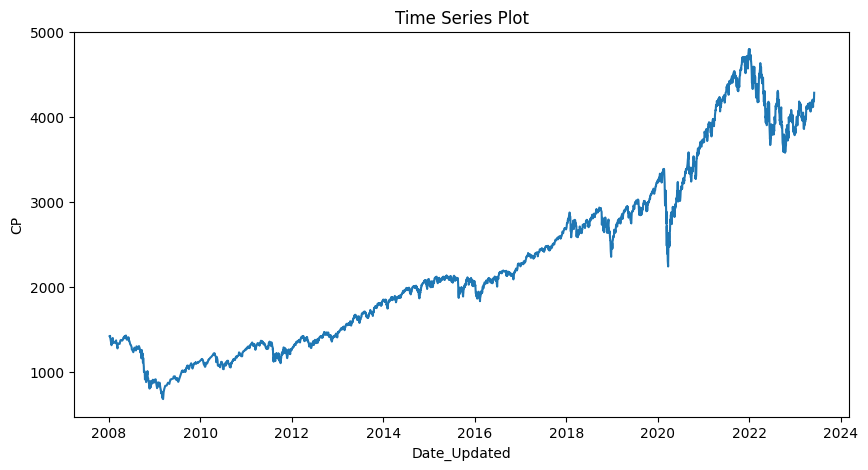

In [13]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(merged_df['CP'])
plt.title('Time Series Plot')
plt.xlabel('Date_Updated')
plt.ylabel('CP')
plt.show()

In [14]:
column_names_list = merged_df.columns.tolist()
print(column_names_list)

['index', 'Title', 'Date', 'CP', 'Title_Vector', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec

In [15]:
interaction_df = pd.DataFrame()

for i in range(1, 101):
    interaction_df[f'sent_sum_doc2vec_{i}'] = merged_df['sent_sum'] * merged_df[f'doc2vec_{i}']
    interaction_df[f'sent_avg_doc2vec_{i}'] = merged_df['sent_avg'] * merged_df[f'doc2vec_{i}']

# Concatenate interaction features all at once
merged_df = pd.concat([merged_df, interaction_df], axis=1)

# Make a copy to defragment and improve performance
merged_df = merged_df.copy()

C:\Users\georg\AppData\Local\Temp\ipykernel_34128\2837349153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_df[f'sent_sum_doc2vec_{i}'] = merged_df['sent_sum'] * merged_df[f'doc2vec_{i}']
C:\Users\georg\AppData\Local\Temp\ipykernel_34128\2837349153.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_df[f'sent_avg_doc2vec_{i}'] = merged_df['sent_avg'] * merged_df[f'doc2vec_{i}']
C:\Users\georg\AppData\Local\Temp\ipykernel_34128\2837349153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This

In [16]:
merged_df.head()

,index,Title,Date,CP,Title_Vector,doc2vec_1,doc2vec_2,doc2vec_3,doc2vec_4,doc2vec_5,...,sent_sum_doc2vec_96,sent_avg_doc2vec_96,sent_sum_doc2vec_97,sent_avg_doc2vec_97,sent_sum_doc2vec_98,sent_avg_doc2vec_98,sent_sum_doc2vec_99,sent_avg_doc2vec_99,sent_sum_doc2vec_100,sent_avg_doc2vec_100
Date_Updated,,,,,,,,,,,,,,,,,,,,,
2008-01-07,4,U.S. Stocks Climb As Hopes Increase For More F...,2008-01-07,1416.18,[-0.01012325 -0.04091054 0.01843826 -0.059596...,-0.010123,-0.040911,0.018438,-0.059596,0.042441,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
2008-01-09,5,How Investing in Intangibles -- Like Employee ...,2008-01-09,1409.13,[-0.00893813 0.0210733 0.08976518 0.066204...,-0.008938,0.021073,0.089765,0.066205,0.066613,...,0.084448,0.007677,0.001579,0.000144,-0.031361,-0.002851,-0.101437,-0.009222,-0.029178,-0.002653
2008-01-09,6,Head And Shoulders Top Bodes Ill For Bulls,2008-01-09,1409.13,[-0.00562841 0.04856686 -0.00201809 -0.001161...,-0.005628,0.048567,-0.002018,-0.001162,0.021268,...,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-10,7,U.S. Stocks Zigzag Higher As Bernanke Speech S...,2008-01-10,1420.33,[-0.02991403 0.0134581 0.01525215 -0.051861...,-0.029914,0.013458,0.015252,-0.051862,0.036416,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-22,8,It's a Black Monday as stock markets tank in e...,2008-01-22,1310.50,[ 0.00919414 -0.02373865 0.00052759 0.007831...,0.009194,-0.023739,0.000528,0.007832,0.051008,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
# Drop "Title_Vector"
merged_df = merged_df.drop(columns=['Title_Vector'])

# Group by Date index, concatenate Title strings separated by "; ", sum all other columns
df_combined = merged_df.groupby(merged_df.index).agg(
    {
        'Title': lambda x: '; '.join(x),
        'CP': 'mean',
        **{col: 'sum' for col in merged_df.columns if col not in ['Title', 'CP', 'Date']}
    }
)

# df_combined now has combined features by date, with Title concatenated and no Title_Vector
print(df_combined.head())

                                                          Title       CP  \
Date_Updated                                                               
2008-01-07    U.S. Stocks Climb As Hopes Increase For More F...  1416.18   
2008-01-09    How Investing in Intangibles -- Like Employee ...  1409.13   
2008-01-10    U.S. Stocks Zigzag Higher As Bernanke Speech S...  1420.33   
2008-01-22    It's a Black Monday as stock markets tank in e...  1310.50   
2008-01-29    Former Connecticut hedge fund exec sues in son...  1362.30   

              index  doc2vec_1  doc2vec_2  doc2vec_3  doc2vec_4  doc2vec_5  \
Date_Updated                                                                 
2008-01-07        4  -0.010123  -0.040911   0.018438  -0.059596   0.042441   
2008-01-09       11  -0.014567   0.069640   0.087747   0.065043   0.087881   
2008-01-10        7  -0.029914   0.013458   0.015252  -0.051862   0.036416   
2008-01-22       38  -0.011182   0.113825   0.274587  -0.006015   0.110841   

In [18]:
print(df_combined.shape)
column_names_list = df_combined.columns.tolist()
print(column_names_list)

(3317, 305)
['Title', 'CP', 'index', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'doc2v

In [19]:
for i in range(1321,1351):
    print(df_combined["sent_sum_doc2vec_25"][i], "  =  ", df_combined["sent_sum"][i], "   x   ", df_combined["doc2vec_25"][i])

-0.075538299   =   -1.2    x    0.16124908300000002
0.0   =   0.0    x    -0.057560109
-0.0098784498   =   -0.6    x    0.043121949
0.0   =   0.0    x    0.0065940575999999945
-0.0376234506   =   -1.7999999999999998    x    0.12475188400000001
0.0283410942   =   -0.6    x    -0.047235157
-0.0783411048   =   -2.4    x    0.12204165300000001
0.0   =   0.0    x    -0.05714593885
0.0   =   0.0    x    -0.054441538
0.0   =   0.0    x    0.0845032
0.0208322232   =   -1.2    x    -0.017451609999999992
0.0   =   0.0    x    0.052439074
0.0195950724   =   -0.6    x    -0.039816686
-0.06902534444   =   -1.2999999999999998    x    0.11406103420000001
0.03938922   =   -0.4    x    0.291146221
0.0   =   0.0    x    0.036899388
0.016604057399999997   =   -1.2    x    -0.047583837000000004
-0.040116682380000004   =   -1.7999999999999998    x    0.4372712973
0.016274037   =   -1.0    x    -0.028364264
-0.029939651999999997   =   -0.6    x    -0.026719533000000004
0.010403958000000005   =   -1.2    x  

C:\Users\georg\AppData\Local\Temp\ipykernel_34128\3935394514.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_combined["sent_sum_doc2vec_25"][i], "  =  ", df_combined["sent_sum"][i], "   x   ", df_combined["doc2vec_25"][i])


In [20]:
df_combined = df_combined.sort_index()
lags = range(1, 11)
doc2vec_range = range(1, 100)

# Columns to lag
cols_to_lag = ['CP', 'sent_sum', 'sent_avg'] + \
              [f'doc2vec_{i}' for i in doc2vec_range] + \
              [f'sent_sum_doc2vec_{i}' for i in doc2vec_range] + \
              [f'sent_avg_doc2vec_{i}' for i in doc2vec_range]

# Create lagged features
for lag in lags:
    shifted = df_combined[cols_to_lag].shift(lag)
    shifted.columns = [f'{col}_lag_{lag}' for col in shifted.columns]
    df_combined = pd.concat([df_combined, shifted], axis=1)

In [21]:
column_names_list = df_combined.columns.tolist()
print(df_combined.shape)
print(column_names_list)


(3317, 3305)
['Title', 'CP', 'index', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'doc2

In [22]:
# List of base columns to create moving averages for
base_cols = ['sent_sum', 'sent_avg']

# Add doc2vec columns
doc2vec_cols = [f'doc2vec_{i}' for i in range(1, 101)]

# Interaction columns
sent_sum_inter_cols = [f'sent_sum_doc2vec_{i}' for i in range(1, 101)]
sent_avg_inter_cols = [f'sent_avg_doc2vec_{i}' for i in range(1, 101)]

# Combine all
all_cols = base_cols + doc2vec_cols + sent_sum_inter_cols + sent_avg_inter_cols

# Calculate moving averages for each column
for col in all_cols:
    df_combined[f'{col}_ma5'] = df_combined[col].rolling(window=5, min_periods=1).mean()
    df_combined[f'{col}_ma10'] = df_combined[col].rolling(window=10, min_periods=1).mean()
    df_combined[f'{col}_ma30'] = df_combined[col].rolling(window=30, min_periods=1).mean()

C:\Users\georg\AppData\Local\Temp\ipykernel_34128\2452178246.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_combined[f'{col}_ma5'] = df_combined[col].rolling(window=5, min_periods=1).mean()
C:\Users\georg\AppData\Local\Temp\ipykernel_34128\2452178246.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_combined[f'{col}_ma10'] = df_combined[col].rolling(window=10, min_periods=1).mean()
C:\Users\georg\AppData\Local\Temp\ipykernel_34128\2452178246.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usual

In [23]:
print(df_combined.head)

<bound method NDFrame.head of                                                           Title       CP  \
Date_Updated                                                               
2008-01-07    U.S. Stocks Climb As Hopes Increase For More F...  1416.18   
2008-01-09    How Investing in Intangibles -- Like Employee ...  1409.13   
2008-01-10    U.S. Stocks Zigzag Higher As Bernanke Speech S...  1420.33   
2008-01-22    It's a Black Monday as stock markets tank in e...  1310.50   
2008-01-29    Former Connecticut hedge fund exec sues in son...  1362.30   
...                                                         ...      ...   
2023-05-26    Hedge funds raise bets against US stocks as de...  4205.45   
2023-05-30    How Much of a Problem is Concentrated Leadersh...  4205.52   
2023-05-31    2023 Say on Pay & Proxy Results; S&P 500: Five...  4179.83   
2023-06-01    ASX: Why is Australia's sharemarket underperfo...  4221.02   
2023-06-02    Wall Street ends up on jobs data, debt defau

In [26]:
# Specify X and y
X = df_combined.drop(columns=['CP', 'Title'])
y = df_combined['CP']

In [27]:
column_names_list = df_combined.columns.tolist()
print(column_names_list)

['Title', 'CP', 'index', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'doc2vec_70', 'doc

In [28]:
print(len(column_names_list))

4211


In [29]:
# Define function to extract lag and MA from column names and assign weights
def assign_weight(col_name):
    weight = 1.0
    # Penalize lags more
    if '_lag_' in col_name:
        lag_num = int(col_name.split('_lag_')[-1])
        weight *= lag_num  # increase penalty with lag
    if '_ma' in col_name:
        ma_num = int(col_name.split('_ma')[-1])
        weight *= ma_num/2.5  # increase penalty with MA window
    return weight

In [30]:
weights = np.array([assign_weight(col) for col in X.columns])
print(list(weights))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [31]:
# Scale features by inverse weights
X_weighted = X / weights

In [32]:
X_clean = X_weighted.dropna()
y_clean = y.loc[X_clean.index]

weights_series = pd.Series(weights, index=X.columns)
weights_clean = weights_series.loc[X_clean.columns]

In [33]:
print(f'X shape: {X.shape}')
print(f'X_weighted shape: {X_weighted.shape}')
print(f'X_clean shape: {X_clean.shape}')
print(f'y shape: {y.shape}')
print(f'y_clean shape: {y_clean.shape}')

X shape: (3317, 4209)
X_weighted shape: (3317, 4209)
X_clean shape: (3307, 4209)
y shape: (3317,)
y_clean shape: (3307,)


In [34]:
# Create log change of price as dependent variable (1-period log return)
log_y_clean = np.log(y_clean / y_clean.shift(1))

# Drop all CP_lag columns from X_clean
cp_lag_cols = [col for col in X_clean.columns if col.startswith('CP_lag_')]
X_no_cp_lags = X_clean.drop(columns=cp_lag_cols)

# Create log lagged CP features for each lag present in CP_lag columns
for col in cp_lag_cols:
    lag_num = int(col.split('_')[-1])
    # Lagged log change features are lagged values of log_y_clean
    X_no_cp_lags[f'log_CP_lag_{lag_num}'] = log_y_clean.shift(lag_num)

# Combine features and target into one DataFrame to align indices
data = X_no_cp_lags.copy()
data['log_y'] = log_y_clean

# Drop all rows with any NaNs caused by lagging or target shift
data = data.dropna()
X_3 = data.drop(columns='log_y')
log_y_clean = data['log_y']

C:\Users\georg\AppData\Local\Temp\ipykernel_34128\2233364207.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_no_cp_lags[f'log_CP_lag_{lag_num}'] = log_y_clean.shift(lag_num)
C:\Users\georg\AppData\Local\Temp\ipykernel_34128\2233364207.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_no_cp_lags[f'log_CP_lag_{lag_num}'] = log_y_clean.shift(lag_num)
C:\Users\georg\AppData\Local\Temp\ipykernel_34128\2233364207.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_pd = scaler.fit_transform(X_3)
X_scaled = pd.DataFrame(X_scaled_pd, columns=X_3.columns, index=X_3.index)

In [41]:
# Store results for top 5 models by BIC
top_models = []

# Time series CV
tscv = TimeSeriesSplit(n_splits=5)

alphas = np.logspace(-3, 1, 100)

for alpha in alphas:
    bic_fold_scores = []
    rss_list = []
    k_list = []
    for train_index, test_index in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = log_y_clean.iloc[train_index], log_y_clean.iloc[test_index]

        model = Lasso(alpha=alpha, max_iter=1000, tol=1e-3)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rss = np.sum((y_test - y_pred) ** 2)
        n = len(y_test)
        k = np.sum(model.coef_ != 0)

        if k == 0:
            bic = np.inf
        else:
            bic = n * np.log(rss / n) + k * np.log(n)

        bic_fold_scores.append(bic)
        rss_list.append(rss)
        k_list.append(k)

    avg_bic = np.mean(bic_fold_scores)
    avg_rss = np.mean(rss_list)
    avg_k = np.mean(k_list)

    top_models.append({
        'alpha': alpha,
        'avg_bic': avg_bic,
        'avg_rss': avg_rss,
        'avg_k': avg_k
    })




In [42]:
# Sort by avg_bic and take top 5
top_models = sorted(top_models, key=lambda x: x['avg_bic'])[:5]

# Report for top 5
for i, model_info in enumerate(top_models):
    alpha = model_info['alpha']
    print(f"\nModel {i+1} with alpha={alpha:.6f} and average BIC={model_info['avg_bic']:.4f}")

    # Fit model on full data
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, log_y_clean)

    # Scale coefficients back by weights
    coef = lasso.coef_ / weights[:len(lasso.coef_)]

    selected = np.where(coef != 0)[0]
    selected_features = X_scaled.columns[selected]

    # Predictions and metrics on full data
    y_pred_full = lasso.predict(X_scaled)
    rss_full = np.sum((log_y_clean - y_pred_full) ** 2)
    n_full = len(log_y_clean)
    k_full = len(selected_features)

    aic_full = n_full * np.log(rss_full / n_full) + 2 * k_full
    bic_full = n_full * np.log(rss_full / n_full) + k_full * np.log(n_full)
    r2_full = lasso.score(X_scaled, log_y_clean)

    # OLS for p-values on selected features
    if len(selected_features) > 0:
        X_sel = sm.add_constant(X_scaled[selected_features])
        ols_model = sm.OLS(log_y_clean, X_sel).fit()
        print(ols_model.summary())
    else:
        print("No variables selected.")

    print(f"AIC: {aic_full:.4f}, BIC: {bic_full:.4f}, R^2: {r2_full:.4f}")



Model 1 with alpha=0.001322 and average BIC=-4990.3517
                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     40.52
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           3.44e-33
Time:                        21:47:20   Log-Likelihood:                 9544.1
No. Observations:                3296   AIC:                        -1.908e+04
Df Residuals:                    3291   BIC:                        -1.905e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:
# Plot actual vs predicted for best alpha
best_alpha = top_models[0]['alpha']
best_lasso = Lasso(alpha=best_alpha, max_iter=10000)
best_lasso.fit(X_scaled, log_y_clean)
y_pred_best = best_lasso.predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(log_y_clean.values, label='Actual')
plt.plot(y_pred_best, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Log Returns (Best Lasso Model)')
plt.show()

In [ ]:
window = 21
min_pts = window

actual_smoothed = log_y_clean.rolling(window=window, min_periods=min_pts).mean()
pred_smoothed = pd.Series(y_pred_best, index=log_y_clean.index).rolling(window=window, min_periods=min_pts).mean()
residuals = log_y_clean - y_pred_best
resid_smoothed_std = residuals.rolling(window=window, min_periods=min_pts).std()

# Drop NA values from smoothing to avoid plotting unstable ends
valid_idx = actual_smoothed.dropna().index

plt.figure(figsize=(12, 6))
plt.plot(valid_idx, actual_smoothed.loc[valid_idx], label='Actual (Smoothed)', color='blue')
plt.plot(valid_idx, pred_smoothed.loc[valid_idx], label='Predicted (Smoothed)', color='red')
plt.fill_between(valid_idx,
                 pred_smoothed.loc[valid_idx] - 1.96 * resid_smoothed_std.loc[valid_idx] / np.sqrt(window),
                 pred_smoothed.loc[valid_idx] + 1.96 * resid_smoothed_std.loc[valid_idx] / np.sqrt(window),
                 color='red', alpha=0.3, label='95% CI')

plt.xlabel('Year')
plt.ylabel('Log Returns')
plt.title('Actual vs Predicted Log Returns (Smoothed, 1 Month Rolling)')
plt.legend()
plt.grid(True)

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()